# Case study: CHURN
**Barbora Soukupová**

#### 0. Imports

In [171]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

#### 1. Load Data & Explore

In [65]:
df = pd.read_csv('churn_data_sample.csv', delimiter = ";")

In [66]:
df.head(10)

,gender,is_senior,has_partner,has_dependents,months_customer,has_phone_service,has_multiple_lines,has_internet,has_online_security,uses_online_backup,uses_device_protection,uses_tech_support,uses_streaming_tv,uses_streaming_movies,contract_type,electronic_billing,payment_method,monthly_fees,total_fees,churned
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
1,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
2,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
3,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
4,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
5,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.6,Yes
6,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),77.15,1759.4,No
7,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.10,5016.65,No
8,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15,Yes
9,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,19.4,Yes


In [67]:
df.shape

(6846, 20)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  6846 non-null   object 
 1   is_senior               6846 non-null   int64  
 2   has_partner             6846 non-null   object 
 3   has_dependents          6846 non-null   object 
 4   months_customer         6846 non-null   int64  
 5   has_phone_service       6846 non-null   object 
 6   has_multiple_lines      6846 non-null   object 
 7   has_internet            6846 non-null   object 
 8   has_online_security     6846 non-null   object 
 9   uses_online_backup      6846 non-null   object 
 10  uses_device_protection  6846 non-null   object 
 11  uses_tech_support       6846 non-null   object 
 12  uses_streaming_tv       6846 non-null   object 
 13  uses_streaming_movies   6846 non-null   object 
 14  contract_type           6846 non-null   

In [69]:
excluded = df[df["total_fees"] == ' ']
df_clean = df[df["total_fees"] != ' ']

In [74]:
df_clean["total_fees"] = df_clean.total_fees.astype(float)

In [ ]:
df-clean.info()

#### 1.1 How does the distribution of “months customer” (number of months under contract) look?

<Axes: xlabel='months_customer', ylabel='Percent'>

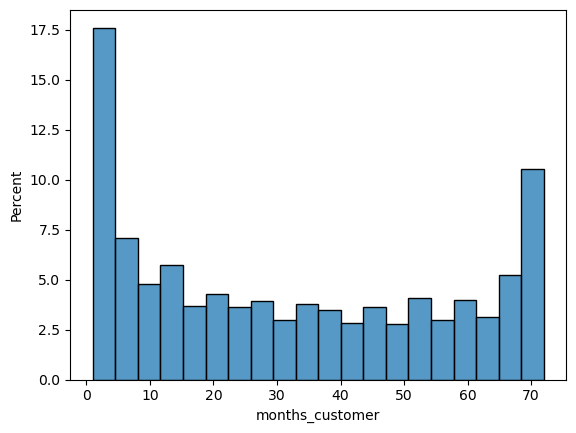

In [129]:
sns.histplot(df_clean, x='months_customer', stat='percent', bins = 20)

#### 1.2 Calculate the average revenue per user by contract type and by months under contract.

Vhodné rozdělení sloupce months_customer

In [75]:
bins = [1, 2, 6, 12, 18, 24,36,48,60,72,100]
labels = ['1','2-6', '6-12', '12-18', '18-24', '24-36','36-48','48-60','60-72','72+']
df_clean['months_descrete'] = pd.cut(df['months_customer'], bins=bins, right=False)
df_clean[['months_descrete','months_customer']].head(10)

,months_descrete,months_customer
0,"[1, 2)",1
1,"[36, 48)",41
2,"[48, 60)",52
3,"[1, 2)",1
4,"[60, 72)",67
5,"[60, 72)",68
6,"[18, 24)",23
7,"[72, 100)",72
8,"[60, 72)",70
9,"[1, 2)",1


In [76]:
df_clean.groupby(['contract_type','months_descrete'])['total_fees'].mean()

contract_type   months_descrete
Month-to-month  [1, 2)               50.578620
                [2, 6)              195.902405
                [6, 12)             541.885453
                [12, 18)            960.522422
                [18, 24)           1403.942121
                [24, 36)           2161.544892
                [36, 48)           3262.275962
                [48, 60)           4339.197477
                [60, 72)           5839.492683
                [72, 100)          7404.425000
One year        [1, 2)               28.407143
                [2, 6)               99.131250
                [6, 12)             313.361940
                [12, 18)            609.107527
                [18, 24)            991.600495
                [24, 36)           1711.564815
                [36, 48)           2737.693800
                [48, 60)           3958.905140
                [60, 72)           5451.835032
                [72, 100)          7175.206667
Two year        [1, 2)      

#### 1.3 Can you identify any pattern in the most profitable customers that churned?

In [152]:
#top 10% of customers that churned
df_churned = df_clean[df_clean['churned'] == 'Yes']
top_10_threshold = df_churned['total_fees'].quantile(0.9)
most_profitable_customers = df_churned[df_churned['total_fees'] >= top_10_threshold]

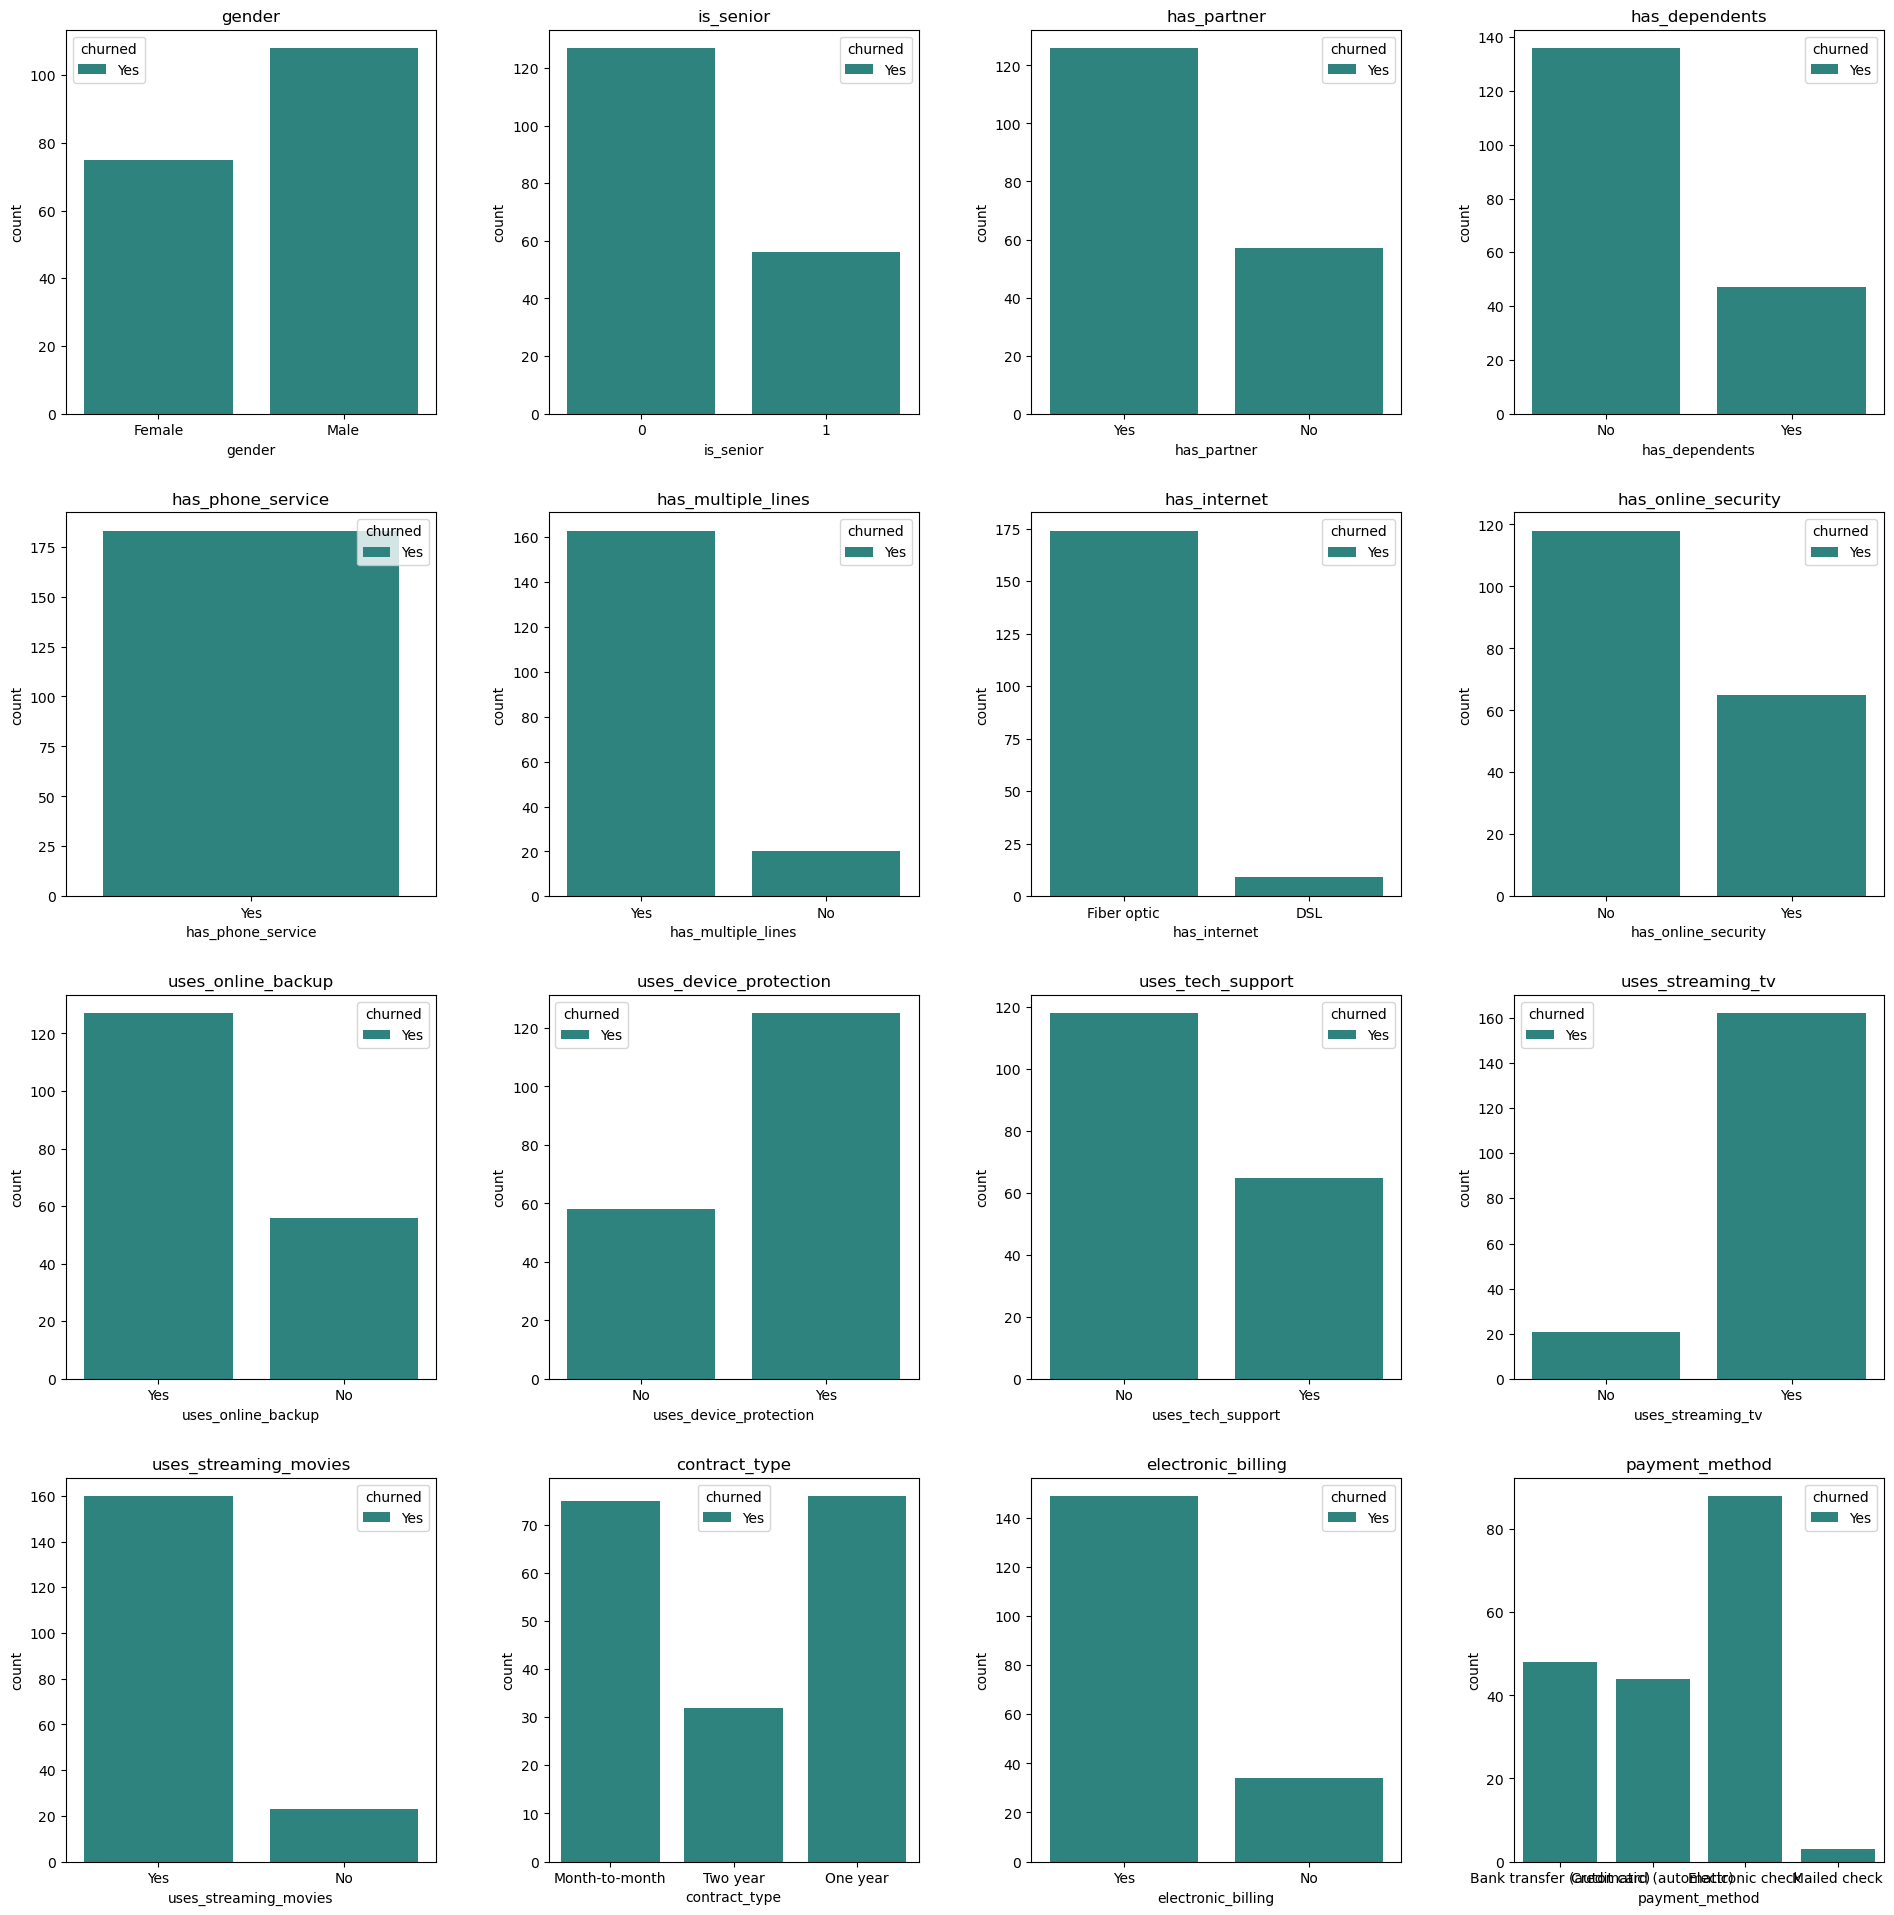

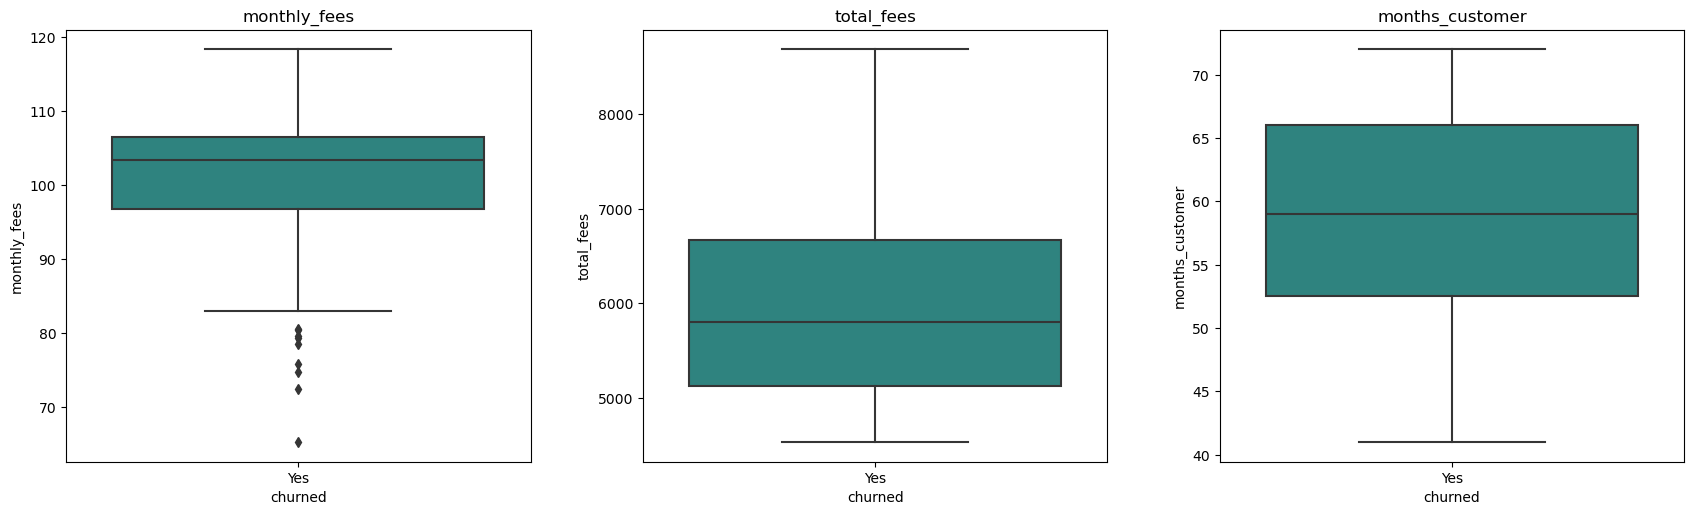

In [151]:
# Categorical variables with respect to churn
categorical_vars = ['gender', 'is_senior', 'has_partner', 'has_dependents', 'has_phone_service',
                    'has_multiple_lines', 'has_internet', 'has_online_security',
                    'uses_online_backup', 'uses_device_protection', 'uses_tech_support', 
                    'uses_streaming_tv', 'uses_streaming_movies', 'contract_type', 
                    'electronic_billing', 'payment_method']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='churned', data=most_profitable_customers, ax=axes[i//4, i%4], palette='viridis')
    axes[i//4, i%4].set_title(f'{var}')
plt.show()

# Numereical variables with respect to churn
numerical_vars = ['monthly_fees', 'total_fees', 'months_customer']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.tight_layout(pad=5.0)

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='churned', y=var, data=most_profitable_customers, ax=axes[i], palette= 'viridis')
    axes[i].set_title(f'{var}')
plt.show()

#### 1.4 Which variables are the main drivers of churn? 

In [80]:
df_clean['churned_num'] = df['churned'].map({'Yes': 1, 'No': 0})
df_model = df_clean.drop(columns=['months_descrete'])

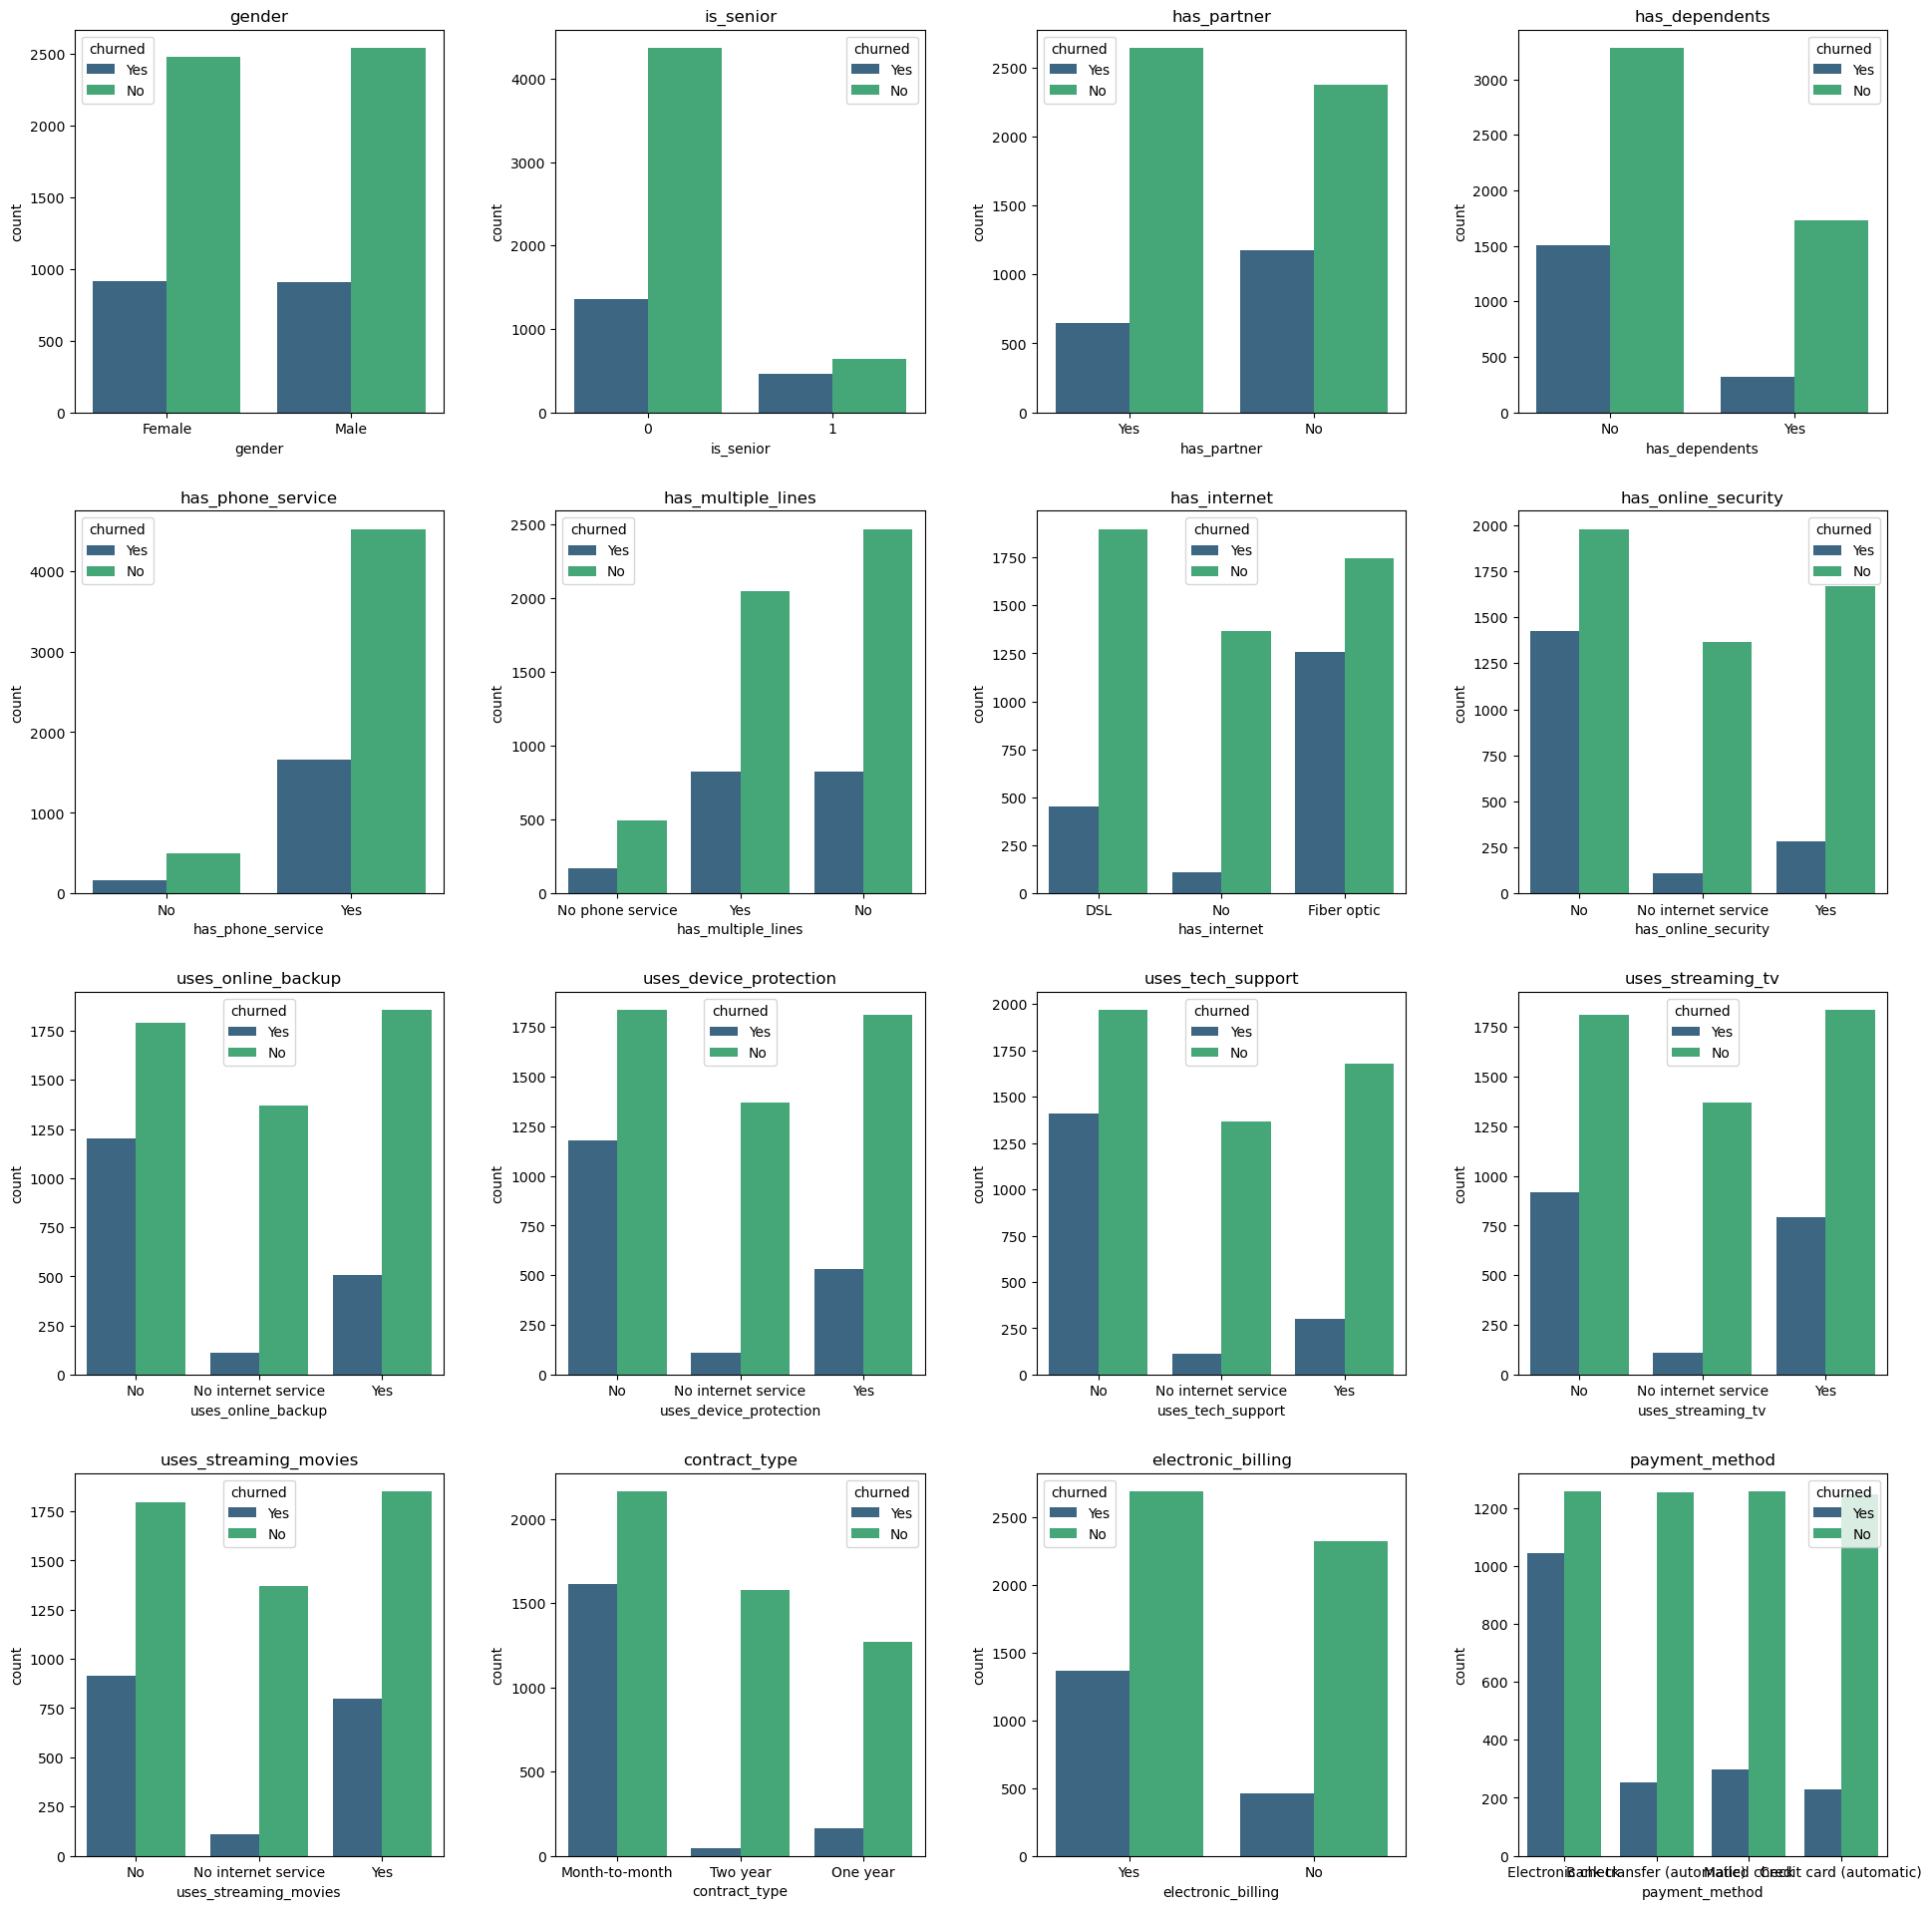

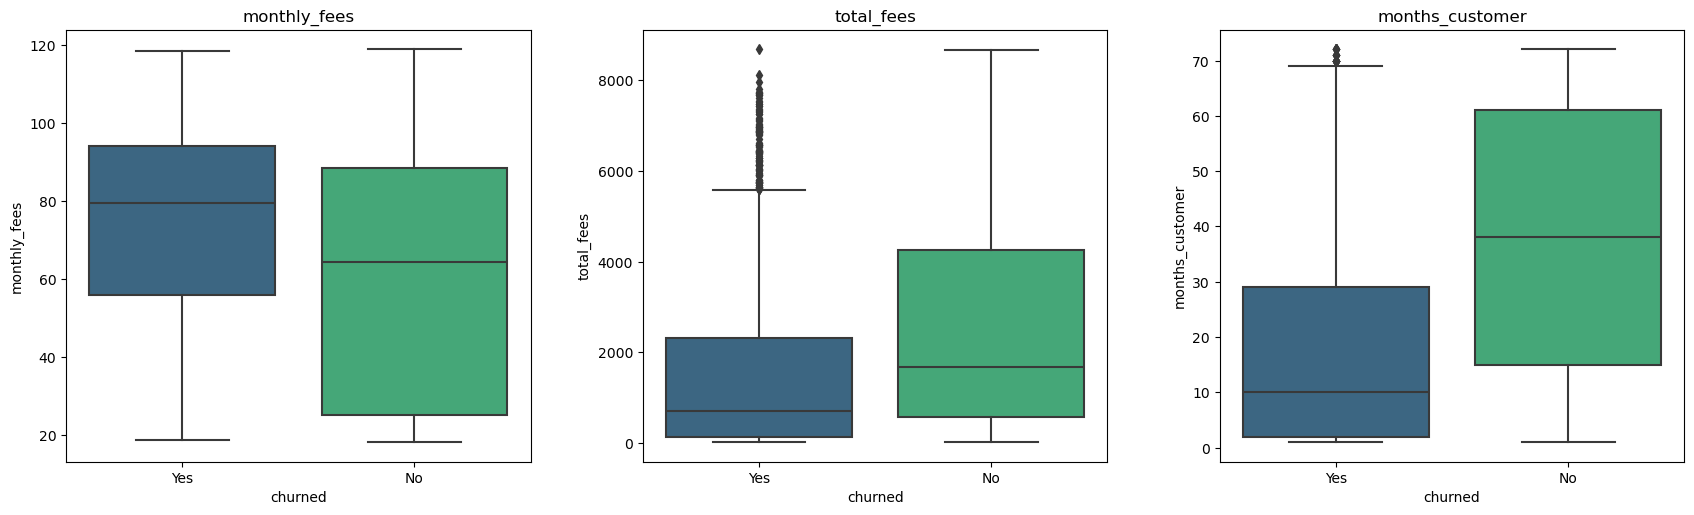

In [91]:
# Visualize the distribution of categorical variables with respect to churn
categorical_vars = ['gender', 'is_senior', 'has_partner', 'has_dependents', 'has_phone_service',
                    'has_multiple_lines', 'has_internet', 'has_online_security',
                    'uses_online_backup', 'uses_device_protection', 'uses_tech_support', 
                    'uses_streaming_tv', 'uses_streaming_movies', 'contract_type', 
                    'electronic_billing', 'payment_method']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='churned', data=df_model, ax=axes[i//4, i%4], palette='viridis')
    axes[i//4, i%4].set_title(f'{var}')

plt.show()

#Numereical variables 
numerical_vars = ['monthly_fees', 'total_fees', 'months_customer']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.tight_layout(pad=5.0)

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='churned', y=var, data=df_model, ax=axes[i], palette= 'viridis')
    axes[i].set_title(f'{var}')

plt.show()

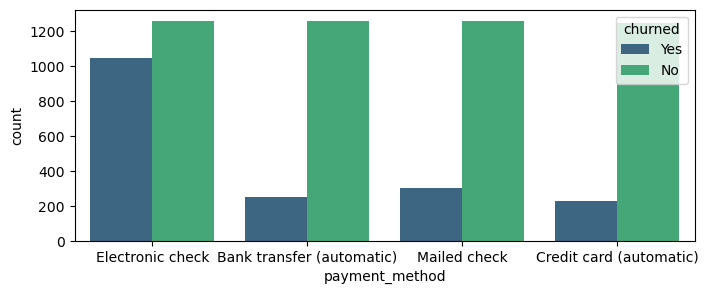

In [135]:
# Visualize the distribution of categorical variables with respect to churn
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
sns.countplot(x='payment_method', hue='churned', data=df_model, palette='viridis')
plt.show()

In [ ]:
Feature Importance Using Random Forrest 

In [158]:
X = df_model.drop(columns=['churned', 'churned_num'])
y = df_model['churned_num']
X = pd.get_dummies(X, drop_first=True)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42,stratify = y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)


,feature,importance
0,total_fees,0.192712
1,months_customer,0.172420
2,monthly_fees,0.171061
3,has_internet_Fiber optic,0.037005
4,payment_method_Electronic check,0.035616
5,contract_type_Two year,0.031672
6,has_online_security_Yes,0.028899
7,gender_Male,0.028333
8,electronic_billing_Yes,0.025783
9,uses_tech_support_Yes,0.023702


## 2. Model Building 

In [167]:
X = df_model.drop(columns=['churned', 'churned_num'])
y = df_model['churned_num']
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)


In [174]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [5, 10, 30,50,75,100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on testing set with best model: {accuracy:.4f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 75}
Accuracy on testing set with best model: 0.8026


In [ ]:
# Predict on the testing set
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Evaluate model performance on testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on testing set: {accuracy:.4f}')

## 3. Test on Your Data  

In [179]:
import joblib
import pickle
from io import BytesIO
import requests
import pandas as pd

joblib.dump(gb, 'gb_model')

['gb_model']

In [173]:
from joblib import dump, load
from io import BytesIO
import requests
import pandas as pd


mLink = 'https://github.com/soudkynebarbora/DataMining_Secon-Assignment/raw/main/final_model.joblib'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

file = 'churn_data_sample.csv
data = pd.read_csv(file, delimiter = ";")
data = df[df["total_fees"] != ' ']
data["total_fees"] = df_clean.total_fees.astype(float)
dataX = pd.get_dummies(X, drop_first=True)


model.predict(dataX)

FileNotFoundError: [Errno 2] No such file or directory: 'your path'